**Name**: Navina Govindaraj

**Date**: April 2017

# Test a Perceptual Phenomenon: The Stroop Effect

The Stroop dataset contains data from participants who were presented with a list of words, with each word displayed in a color of ink. The participant’s task was to say out loud the color of the ink in which the word was printed. The task had two conditions: a congruent words condition, and an incongruent words condition. 
- In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed. 
- In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed. In each case, the time it took to name the ink colors were measured in equally-sized lists.

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Variables

In [2]:
stroop_data = pd.read_csv('./stroopdata.csv')
stroop_data.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


**Independent variable**: Treatment condition consisting of congruent and incongruent words

**Dependent variable**: Response time 

# Hypothesis

$H_0 :  \mu_C = \mu_I $ There is no difference in mean response time between the congruent and incongruent word conditions

$H_a :   \mu_C \neq \mu_I $ There is a difference in mean response time between the congruent and incongruent word conditions

$\mu_C$ and $\mu_I$ denote the population means for the congruent and incongruent groups respectively.

- Statistical test: Dependent t-test for paired samples is the statistical test that will be used. 

- This is a within-subject design, where the same subjects are being presented with two test conditions.

The reasons for choosing this test are as follows:

1) The sample size is less than 30

2) The population standard deviation is unknown

3) It is assumed that the distributions are Gaussian


# Data Exploration and Visualization

In [3]:
stroop_data.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [4]:
print "Median:\n", stroop_data.median()
print "\nVariance:\n", stroop_data.var()

Median:
Congruent      14.3565
Incongruent    21.0175
dtype: float64

Variance:
Congruent      12.669029
Incongruent    23.011757
dtype: float64


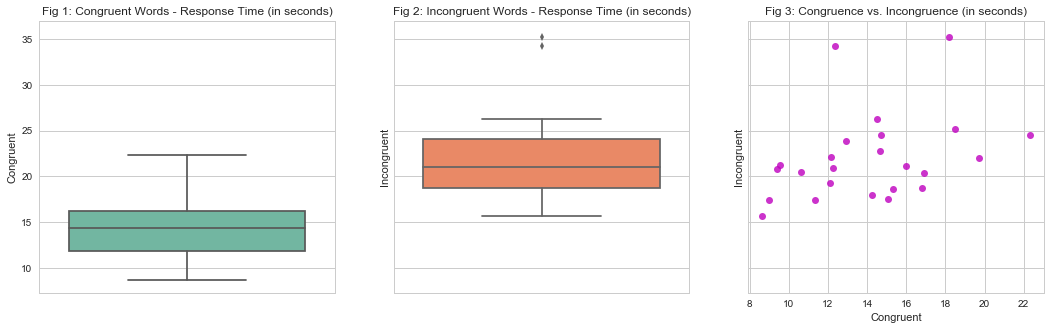

In [5]:
fig, axs = plt.subplots(figsize=(18, 5), ncols = 3, sharey=True)
plt.figure(figsize=(8, 6))
sns.set_palette("Set2")

# Fig 1 - Congruent Words - Response Time
sns.boxplot(y="Congruent", data=stroop_data, 
            ax=axs[0]).set_title("Fig 1: Congruent Words - Response Time (in seconds)")

# Fig 2 - Incongruent Words - Response Time
sns.boxplot(y="Incongruent", data=stroop_data, color="coral", 
            ax=axs[1]).set_title("Fig 2: Incongruent Words - Response Time (in seconds)")

# Fig 3 - Congruence vs. Incongruence
sns.regplot(x="Congruent", y="Incongruent", data=stroop_data, color="m", fit_reg=False,
            ax=axs[2]).set_title("Fig 3: Congruence vs. Incongruence (in seconds)")

- The above visualizations clearly show that the response time for the congruent words condition is much lower in comparison to the incongruent words condition.
- Even if the two outliers present in Fig 2 are ignored, it is evident that not just the mean (14 seconds vs. 22 seconds), but the lower and upper bounds for both conditions are markedly different as well.
- Fig 3 shows a scatter plot of response times from both treatment conditions. The plot shows that for every x value (time taken for congruent words) plotted, the y value (time taken for incongruent words) is higher.

# Statistical Test

α: 0.05

Confidence level: 95%

t-critical value: 1.714

In [6]:
# Dependent t-test for paired samples

stats.ttest_rel(stroop_data["Congruent"], stroop_data["Incongruent"])

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.1030005857111781e-08)

- We reject the null hypothesis since p-value < α level of 0.05
- Hence it can be concluded that there is a difference in mean response time between the congruent and incongruent word conditions
- The results match expectations because every one of the 24 samples in the dataset showed increased response time during the incongruent words condition.

**6. Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!**

- When we are presented with words, we are trained to process the meaning. When we are asked to process the color of the word instead of the word meaning, we are trying to do the opposite of what we are so used to doing. This interference causes a delay in information processing, which is why the time it takes to process incongruent words is more.
- A similar effect is produced in a "Directional Stroop Effect" experiment, where you are required to say the word location in a box, contrary to the actual direction the word states.

# References

https://en.wikipedia.org/wiki/Stroop_effect

https://faculty.washington.edu/chudler/java/readyd.html

https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.stats.ttest_rel.html